In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from numpy.fft import fft, ifft
sns.set()

In [53]:
dir_list=glob.glob('*.csv')
DF_MAIN = pd.DataFrame()
for i in range(len(dir_list)):
    print(dir_list[i])
    DF_AUX=pd.read_csv(dir_list[i])
    DF_AUX["start"] = dir_list[i][0:10]
    sample=int(dir_list[i][11:15])
    DF_AUX["time"] = np.linspace(0, DF_AUX.shape[0]*int(dir_list[i][11:15])/1000, DF_AUX.shape[0])
    DF_AUX["interval"] = dir_list[i][11:15]
    DF_AUX["interval"] = DF_AUX["interval"].astype(int)
    DF_AUX["sensor_id"] = dir_list[i][16:23]
    DF_MAIN = pd.concat([DF_MAIN,DF_AUX])

1623535615-3006-IAJ9206.csv
1624040490-2957-NAI1549.csv
1624374799-3006-MYS2071.csv
1624962426-3006-NAH4736.csv


00


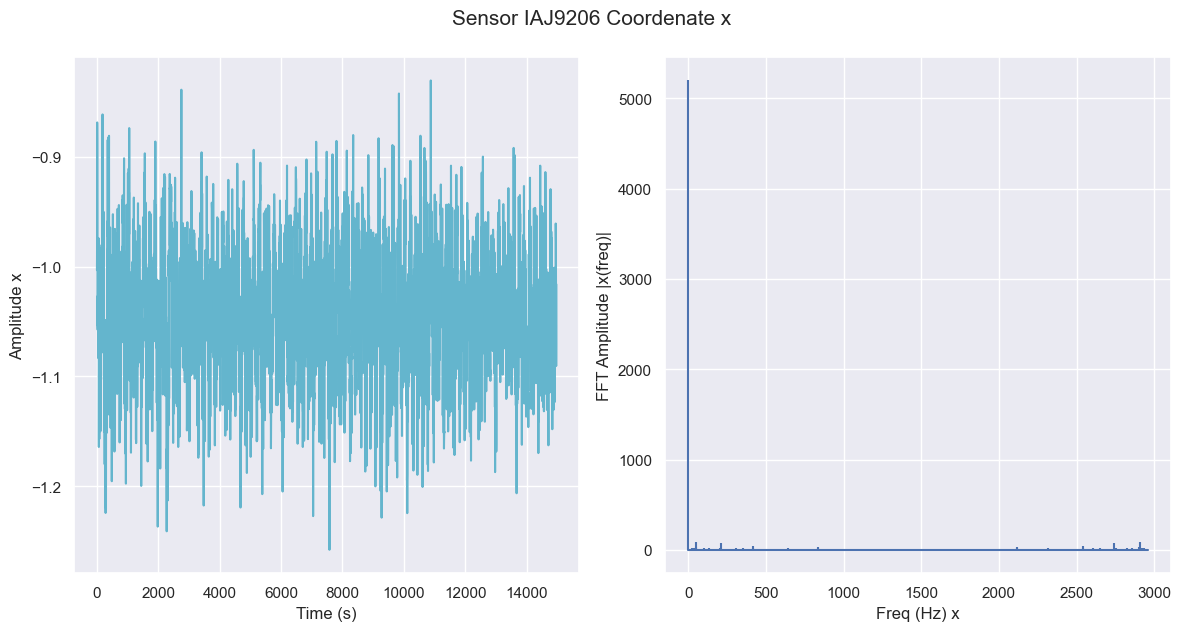

10


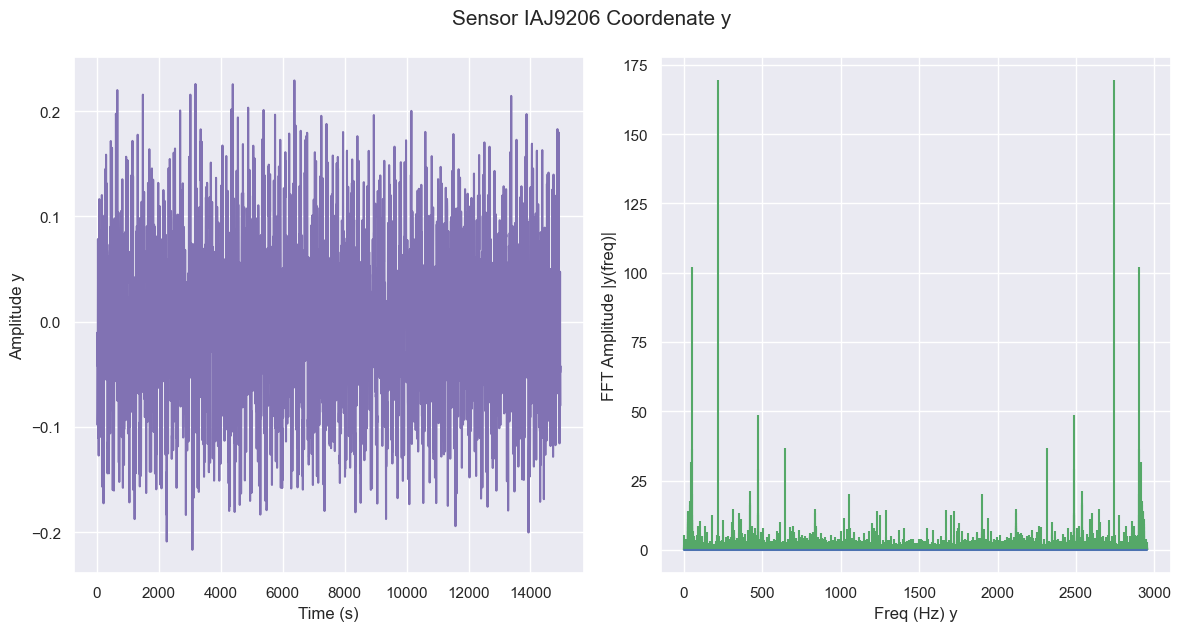

20


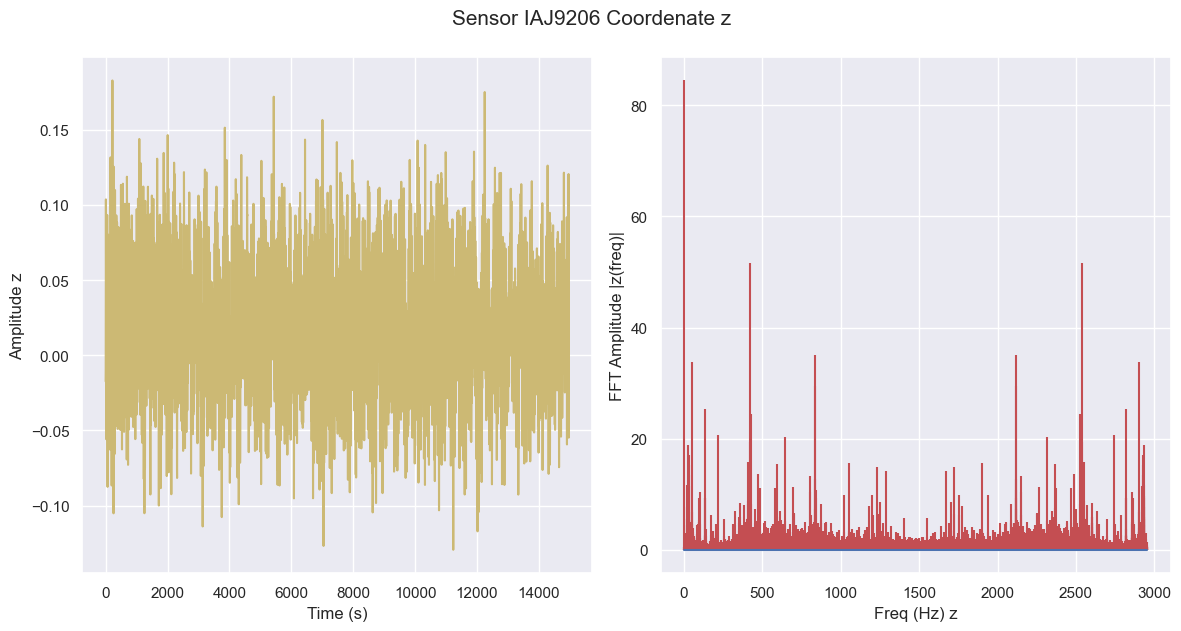

01


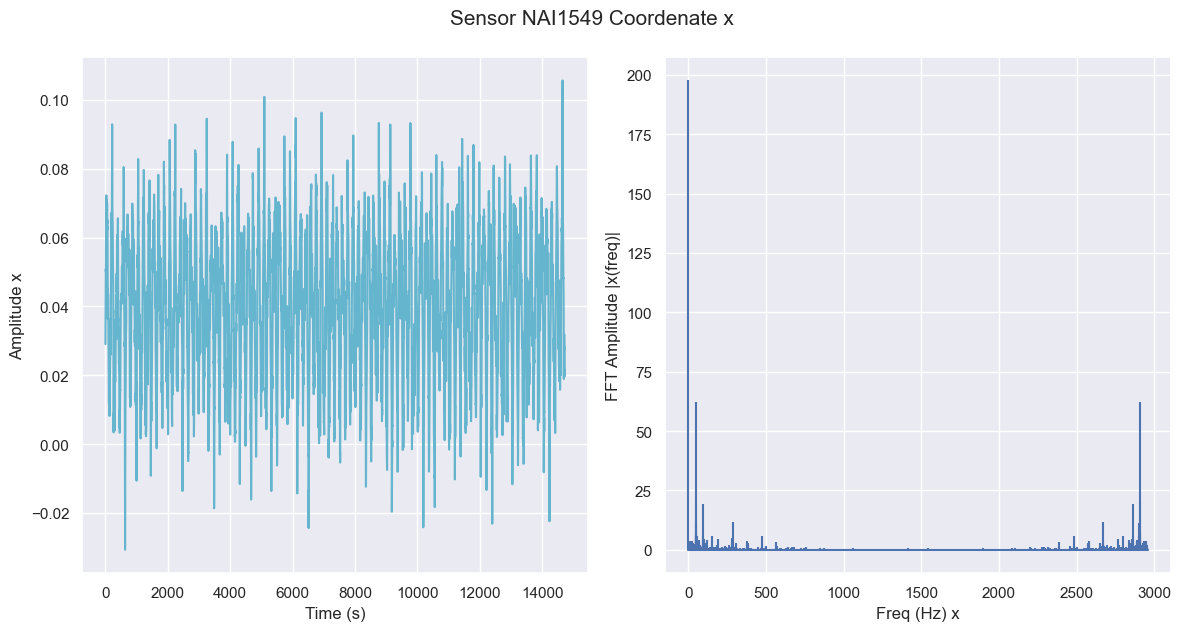

11


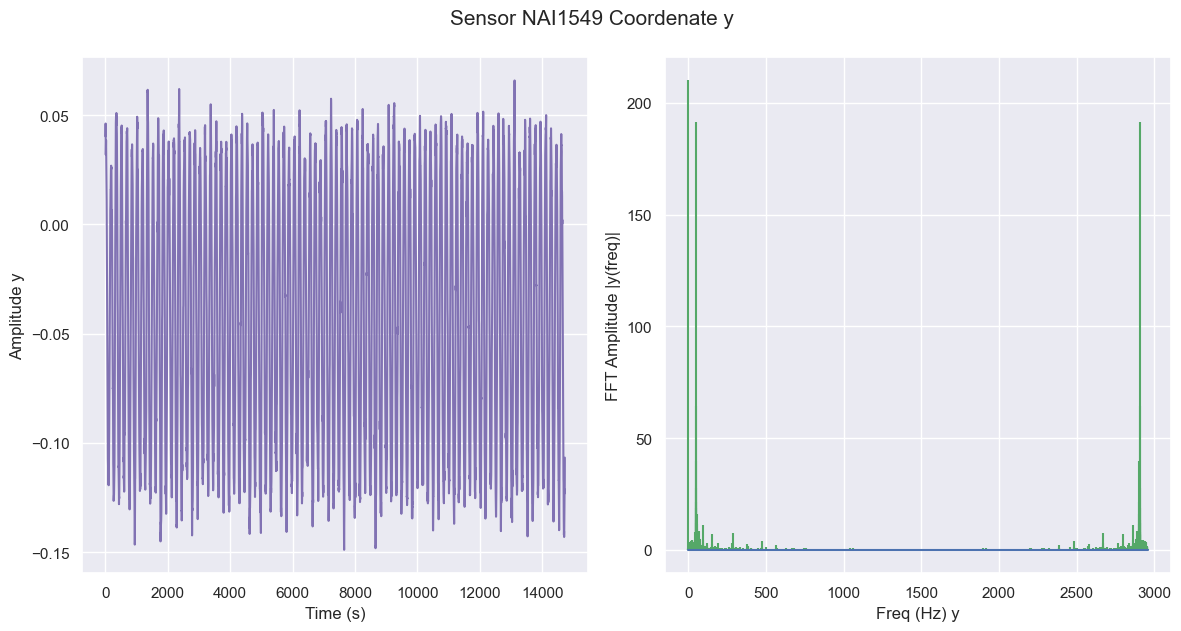

21


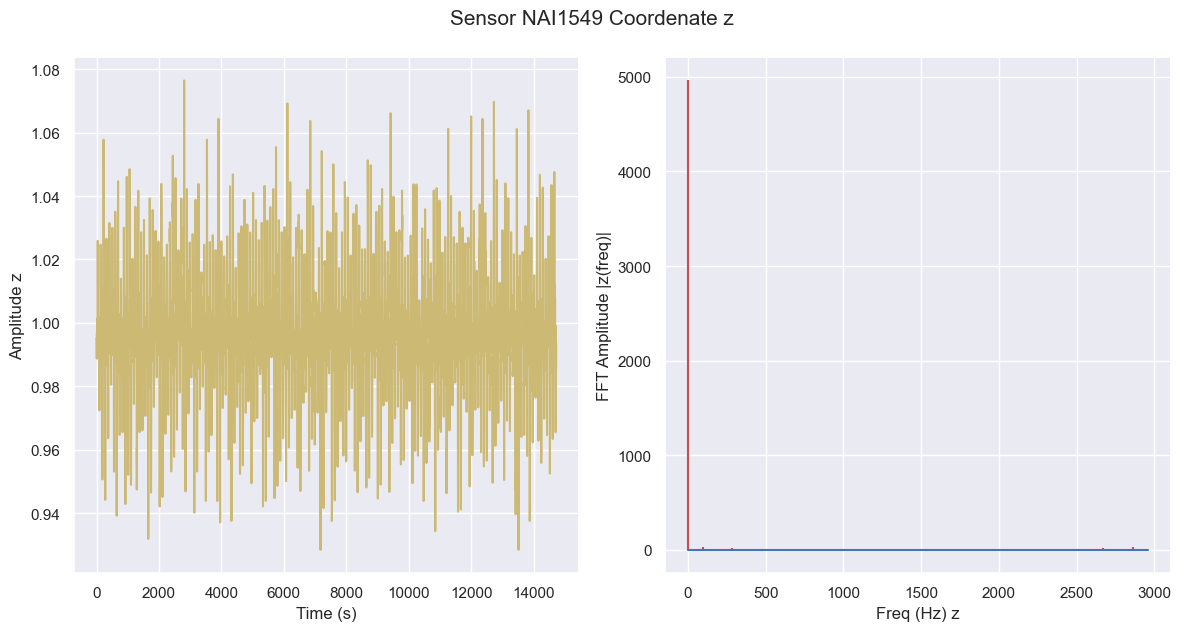

02


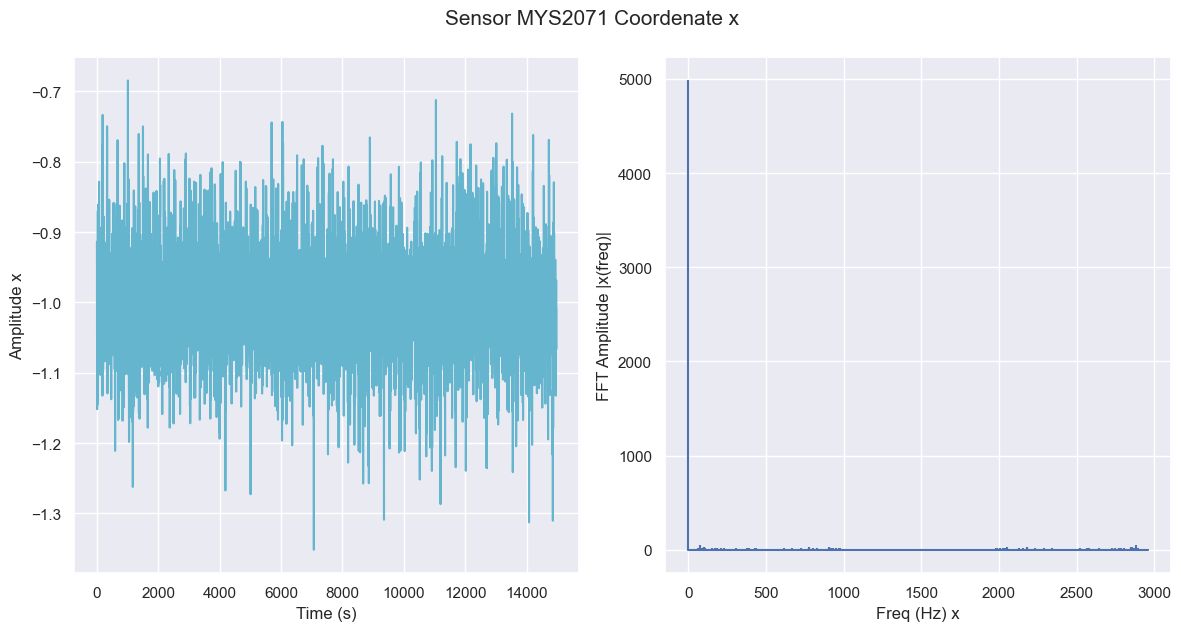

12


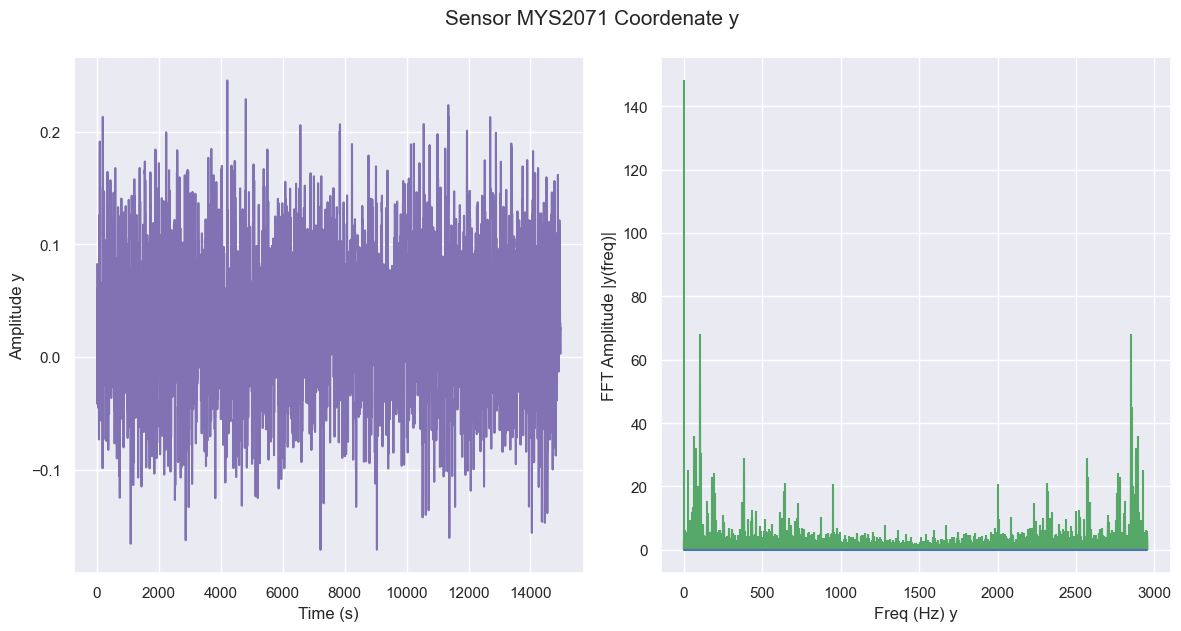

22


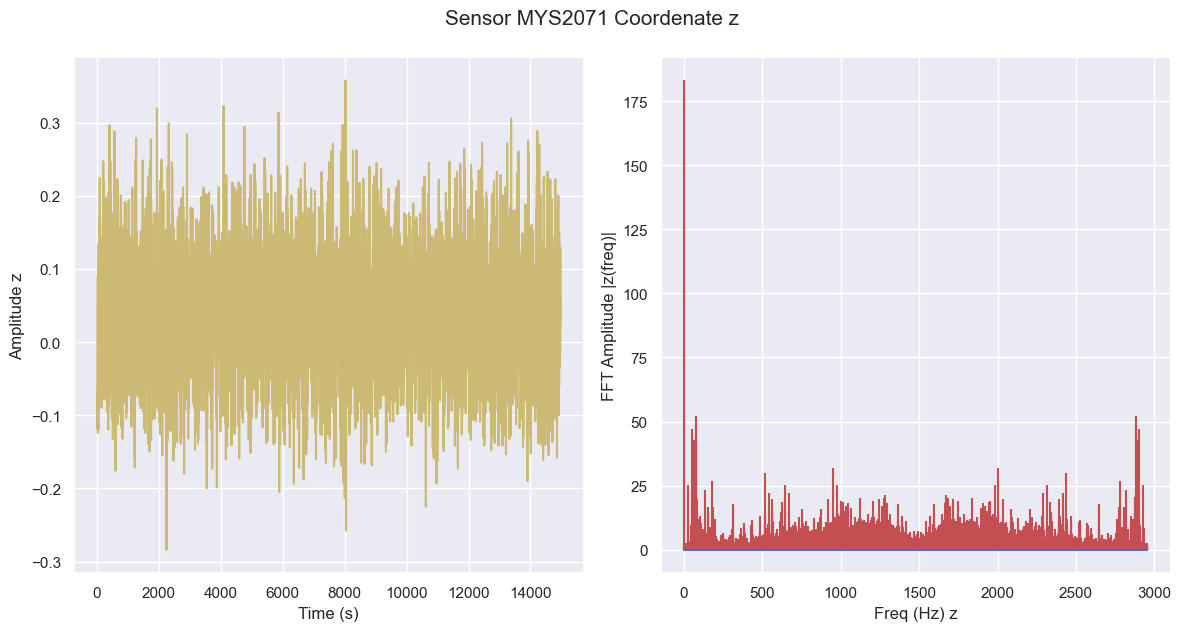

03


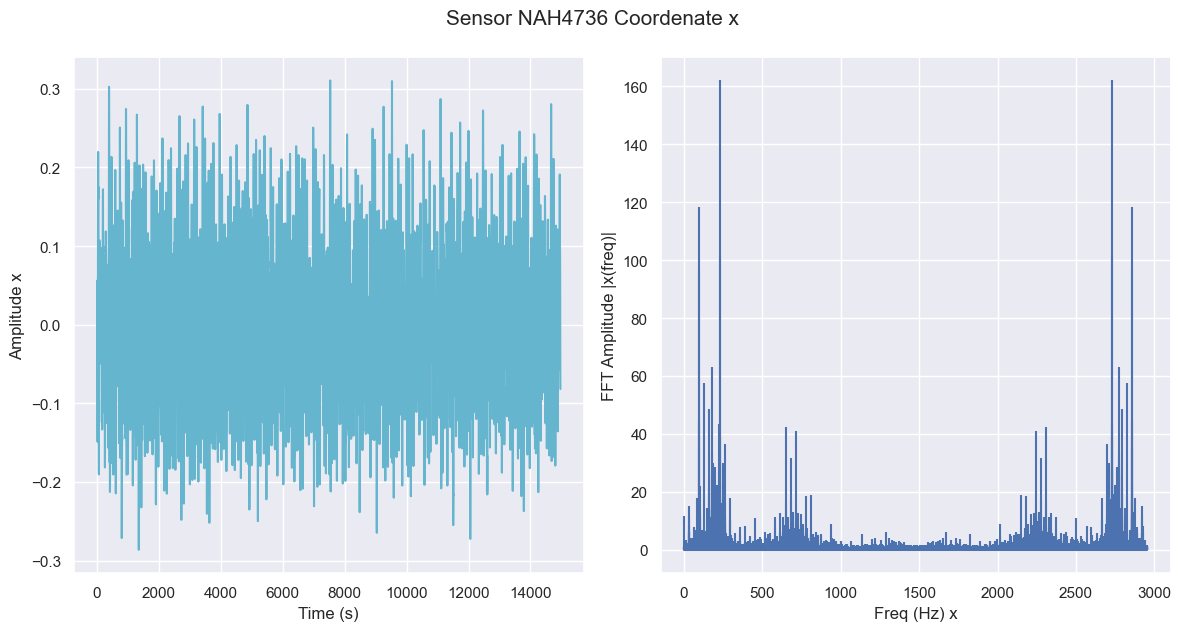

13


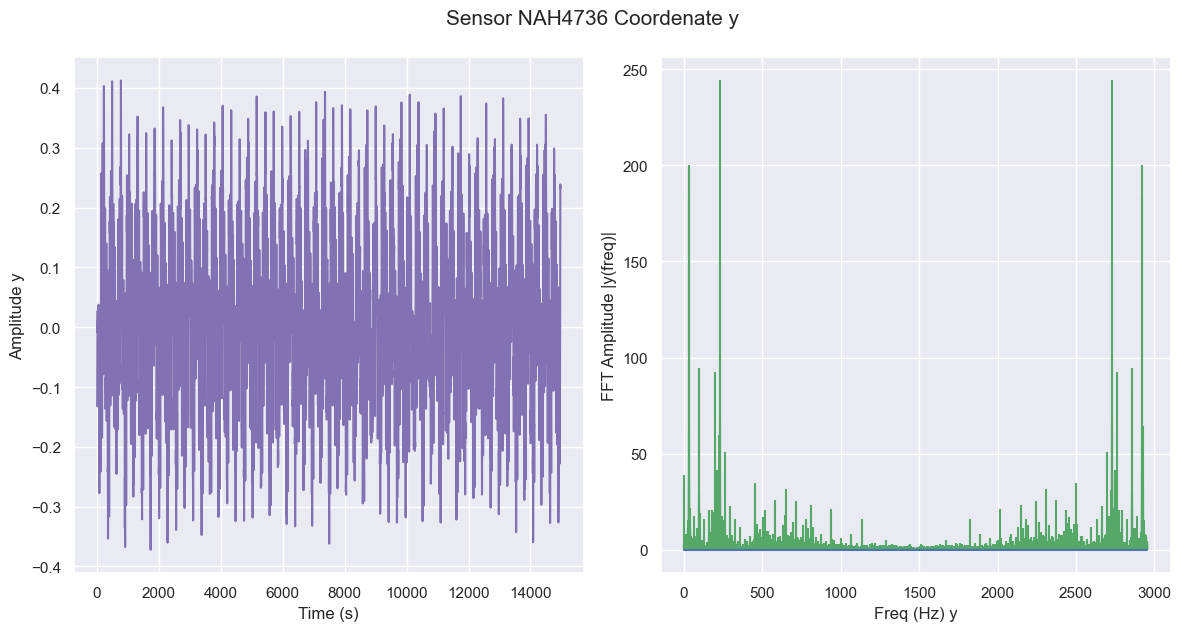

23


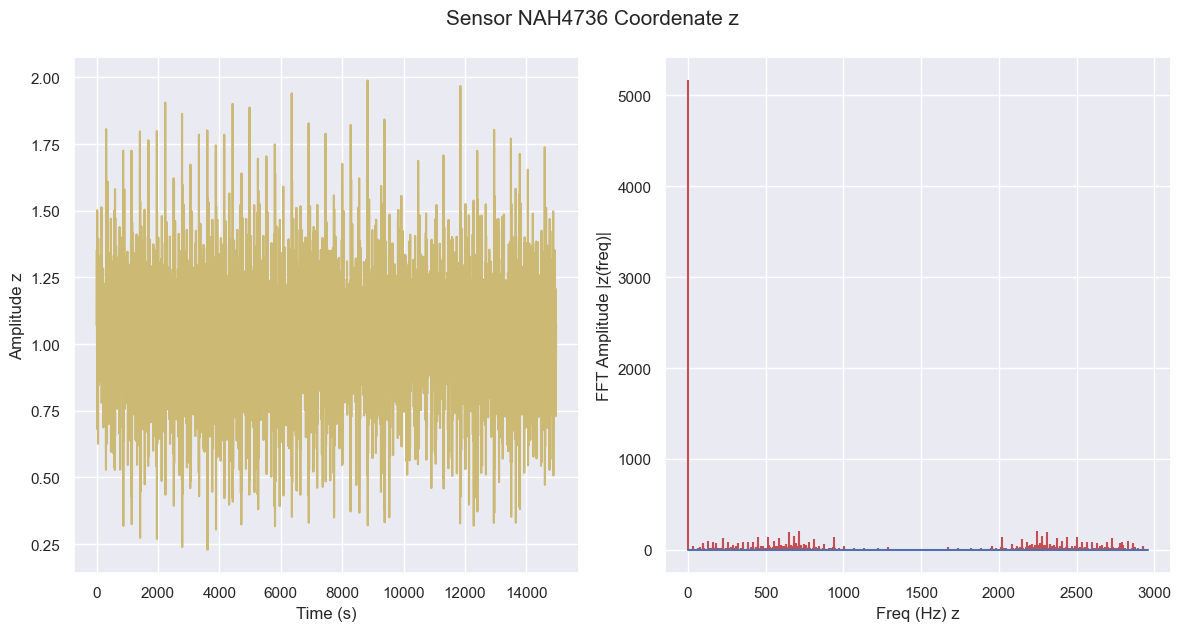

In [110]:
lista=["x","y","z"]
colors = ["b","g","r"]
colors2 = ["c","m","y"]
dir_list=glob.glob('*.csv')
for j in range(len(dir_list)):
    for i in range(len(lista)):
        print(str(i) + str(j))
        x = DF_MAIN.loc[DF_MAIN["sensor_id"]==dir_list[j][16:23],lista[i]]
        X = fft(x)
        N = len(X)
        t = DF_MAIN.loc[DF_MAIN["sensor_id"]==dir_list[j][16:23],"time"]
        sr = 2957
        n = np.arange(N)
        T = N/sr
        freq = n/T 

        plt.figure(figsize = (12, 6))
        plt.subplot(122)

        plt.stem(freq, np.abs(X), colors[i], \
                 markerfmt=" ", basefmt="-b")
        plt.xlabel('Freq (Hz) ' + lista[i])
        plt.ylabel('FFT Amplitude |' + lista[i]+'(freq)|')
        #plt.xlim(0, 10)

        plt.subplot(121)
        plt.plot(t, ifft(X), colors2[i])
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude '+ lista[i])
        plt.tight_layout()
        #plt.title("NAI1549")
        plt.suptitle("Sensor "+dir_list[j][16:23]+" Coordenate "+ lista[i], fontsize=15,x=0.5,y=1.05)
        plt.show()

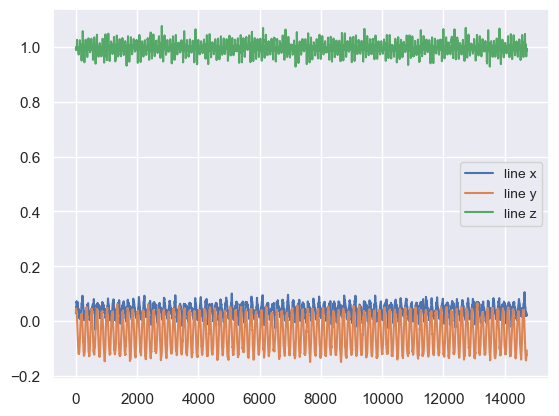

In [58]:
time = DF_MAIN.loc[DF_MAIN["sensor_id"]=="NAI1549","time"]
x = DF_MAIN.loc[DF_MAIN["sensor_id"]=="NAI1549","x"]
y =DF_MAIN.loc[DF_MAIN["sensor_id"]=="NAI1549","y"]
z =DF_MAIN.loc[DF_MAIN["sensor_id"]=="NAI1549","z"]
plt.plot(time, x, label = "line x") 
plt.plot(time, y, label = "line y") 
plt.plot(time, z, label = "line z") 
plt.legend() 
plt.show()